### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
# %load_ext autoreload


# %autoreload
# %reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [56]:
# Import the pipeline creation object
import pandas as pd
import numpy as np
import cbgt as cbgt
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [5]:
# Choose the experiment
experiment_choice = "plastic"
number_of_choices = 2
# Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

# how many simulations do you want to run ? each simulation is executed as a seperate thread

num_sims = 1

num_cores = 7
# set a seed
import time
np.random.seed(int(time.time()))
#seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]
seed = 8867366
print(seed)


in choose pipeline
in reward pipeline
8867366


In [6]:
#Import core functions

# from frontendhelpers import * 
# from tracetype import *
# import qvalues as qval
# import generateepochs as gen
# from agentmatrixinit import *

# import pipeline_creation as pl_creat

# Import plotting functions
# import matplotlib.pyplot as plt

# Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"


# Running the pipeline

### 1. Default values of environment variable

In [7]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None, # default = 600ms
    'thalamic_threshold': None, # default 30sp/s
    'movement_time':None,# #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout':None, #wait for a choice to be made, default 1000, 
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': None,#pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': None, #pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    'number_of_choices':number_of_choices,
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :None,
    'Q_support_params': None,#pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df_set':pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #initialized Q-values df (qvalues.py)  
    'n_trials': 11, #number of trials (generateepochs.py)
    'volatility': [5,"exact"], #frequency of changepoints and type of change points (exact or poisson) (generateepochs.py)
    'conflict': (0.7, 0.3), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.8, # 3 instead? how much stimulus the LIP gets at maximum
    'corticostriatal_plasticity_present':True, # whether plasticity is on or "off" at corticostriatal synapses
    'record_variables':["weight"],#"optogenetic_input"],
    'opt_signal_present':False,
    'opt_signal_probability':[6,7,8,9], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude':-0.5, # ampitude of the stop signal over base line
    'opt_signal_onset':10., # in ms
    'opt_signal_duration':500.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPi"],
    'sustainedfraction':0.7
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


### Run the simulation - 1 thread with the environment variable

In [10]:
# pl.modulelist

In [11]:
results = cbgt.ExecutionManager(cores=num_cores).run([pl]*num_sims,[environment]*num_sims)


SpawnThreadManagers <backend.Pipeline object at 0x7ff7afa32130>
(worker pid=328594) in choose pipeline
(worker pid=328594) change points: [ 0  5 10 10]
(worker pid=328594) conflict (0.7, 0.3)
(worker pid=328594) conflict (0.7, 0.3)
(worker pid=328594) sum 1.0
(worker pid=328594) n_prob_trials [3, 1]
(worker pid=328594) calc_rew        left     right
(worker pid=328594) 0  0.000000  0.000000
(worker pid=328594) 1  0.992578  0.000000
(worker pid=328594) 2  1.022698  0.000000
(worker pid=328594) 3  0.985456  0.000000
(worker pid=328594) 4  0.000000  1.000458
(worker pid=328594) reward_list        left     right
(worker pid=328594) 0  0.000000  0.000000
(worker pid=328594) 1  0.992578  0.000000
(worker pid=328594) 2  1.022698  0.000000
(worker pid=328594) 3  0.985456  0.000000
(worker pid=328594) 4  0.000000  1.000458
(worker pid=328594) conflict (0.7, 0.3)
(worker pid=328594) sum 1.0
(worker pid=328594) n_prob_trials [3, 1]
(worker pid=328594) calc_rew 
(worker pid=328594) in choose pipel

(worker pid=328594) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=328594)   Q_df = Q_df.append(
(worker pid=328594) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=328594)   Q_df = Q_df.append(
(worker pid=328594) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=328594)   Q_df = Q_df.append(
(worker pid=328594) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:125: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=328594)   Q_df = Q_df.

(worker pid=328594) agent.opt_popids [0 1]
(worker pid=328594) agent.opt_popids [0 1]
(worker pid=328594) phasetimer 197
(worker pid=328594) gateFRs [18.88888889 30.22222222]
(worker pid=328594) thresholds_crossed [1]
(worker pid=328594) phasetimer 197
(worker pid=328594) gateFRs [18.88888889 30.22222222]
(worker pid=328594) thresholds_crossed [1]
(worker pid=328594) trial_num 0
(worker pid=328594) chosen_action right
(worker pid=328594) scaled dopamine signal -40.0
(worker pid=328594) trial_num 0
(worker pid=328594) chosen_action right
(worker pid=328594) scaled dopamine signal -40.0
(worker pid=328594) phasetimer 409
(worker pid=328594) gateFRs [30.44444444 16.66666667]
(worker pid=328594) thresholds_crossed [0]
(worker pid=328594) phasetimer 409
(worker pid=328594) gateFRs [30.44444444 16.66666667]
(worker pid=328594) thresholds_crossed [0]
(worker pid=328594) trial_num 1
(worker pid=328594) chosen_action left
(worker pid=328594) scaled dopamine signal 39.40626798367485
(worker pid=

In [12]:
# List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'corticostriatal_plasticity_present', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'par', 'popconstruct', 'ml', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'opt_df', 'opt_channels_df', 'opt_amplitude_df', 'opt_onset_df', 'opt_duration_df', 'opt_populations_df', 'opt_lis

In [13]:
results[0]['meaneff_GABA']

,GPi,GPi,STNE,STNE,GPeP,GPeP,D1STR,D1STR,D2STR,D2STR,LIP,LIP,Th,Th,FSI,LIPI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.058`,0.0`,0.35`,0.0`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.0`,0.058`,0.0`,0.35`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [14]:
results[0]['conflict']

(0.7, 0.3)

In [15]:
results[0]['Q_df']

,left,right
0,0.500000,0.500000
0,0.500000,0.450000
0,0.549258,0.450000
0,0.596602,0.450000
0,0.596602,0.405000
0,0.536942,0.405000
0,0.536942,0.464313
0,0.536942,0.417882
0,0.483247,0.417882
0,0.434923,0.417882


array(['left', 'right'], dtype=object)

In [17]:
experiment_choice

'plastic'

In [19]:
#Extract all the relevant dataframes
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed,experiment_choice)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:118: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = Q_df_local.append(rew_df)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:119: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(chosen_action)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:120: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(block)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:147: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf = perf.append({'%_rewarded_actio

In [20]:
results[0]['popfreqs']

,GPi_left,GPi_right,STNE_left,STNE_right,GPeP_left,GPeP_right,D1STR_left,D1STR_right,D2STR_left,D2STR_right,Cx_left,Cx_right,Th_left,Th_right,FSI_common,CxI_common,Time (ms)
0,66.222222,69.555556,24.333333,26.555556,63.133333,59.488889,3.777778,4.444444,3.111111,4.888889,0.000000,0.000000,6.666667,6.666667,8.666667,0.627240,0
1,64.888889,68.666667,24.200000,26.577778,63.066667,59.466667,4.222222,4.444444,3.111111,4.666667,0.000000,0.000000,6.888889,6.666667,8.222222,0.627240,1
2,65.111111,68.888889,24.177778,26.533333,63.177778,59.800000,4.222222,4.444444,2.888889,4.666667,0.000000,0.000000,6.666667,6.666667,8.444444,0.627240,2
3,65.333333,68.888889,24.222222,26.666667,63.222222,59.911111,4.222222,4.444444,2.888889,4.666667,0.000000,0.000000,6.666667,6.888889,8.222222,0.627240,3
4,64.222222,71.111111,24.133333,26.666667,63.133333,60.066667,4.222222,4.444444,2.888889,4.444444,0.000000,0.000000,6.888889,6.888889,8.444444,0.627240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11804,63.777778,65.111111,25.533333,25.755556,63.533333,58.466667,4.888889,4.000000,3.555556,5.555556,1.552288,1.552288,8.444444,11.555556,8.888889,1.164875,11804
11805,62.444444,66.000000,25.311111,25.577778,64.422222,57.355556,4.888889,4.000000,3.333333,5.555556,1.552288,1.552288,8.444444,11.333333,9.111111,1.164875,11805
11806,62.666667,67.555556,25.111111,25.933333,65.288889,55.844444,4.666667,4.000000,3.555556,5.777778,1.552288,1.552288,8.666667,11.333333,9.111111,1.164875,11806
11807,61.777778,67.333333,24.866667,25.977778,65.711111,55.755556,4.666667,3.777778,3.333333,5.555556,1.633987,1.552288,9.111111,11.111111,8.888889,1.254480,11807


In [21]:
# firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed,n_trials,volatility,volatility_type,conflict
0,0,GPi_left,66.222222,GPi,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
1,1,GPi_left,64.888889,GPi,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
2,2,GPi_left,65.111111,GPi,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
3,3,GPi_left,65.333333,GPi,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
4,4,GPi_left,64.222222,GPi,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
...,...,...,...,...,...,...,...,...,...,...
188939,11804,CxI_common,1.164875,CxI,common,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
188940,11805,CxI_common,1.164875,CxI,common,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
188941,11806,CxI_common,1.164875,CxI,common,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"
188942,11807,CxI_common,1.254480,CxI,common,8867366_0,11.0,5.0,exact,"(0.7, 0.3)"


In [22]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,66.666667,27.272727,left,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
1,0.000000,18.181818,right,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
2,0.000000,27.272727,left,right,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
3,33.333333,27.272727,right,right,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control


In [23]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

nuc_list ['D1-left' 'D2-left' 'D1-right' 'D2-right']
ind_list [[0 0 1 0]
 [0 1 1 1]]


In [24]:
recorded_variables['weight']

,weights,trials,nuclei,seed
0,0.014483,0,D1-left,8867366_0
1,0.033458,1,D1-left,8867366_0
2,0.054915,2,D1-left,8867366_0
3,0.052761,3,D1-left,8867366_0
4,0.024740,4,D1-left,8867366_0
5,0.023089,5,D1-left,8867366_0
6,0.040402,6,D1-left,8867366_0
7,0.021443,7,D1-left,8867366_0
8,0.006763,8,D1-left,8867366_0
9,0.003355,9,D1-left,8867366_0


In [25]:
# recorded_variables['optogenetic_input']

<AxesSubplot:xlabel='trials', ylabel='weights'>

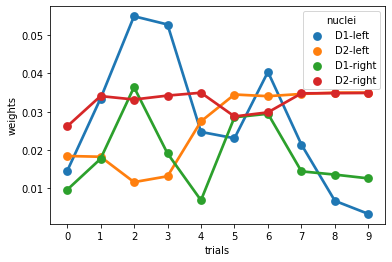

In [26]:
import seaborn as sns
import pylab as pl
sns.pointplot(x="trials",y="weights",hue="nuclei",data=recorded_variables['weight'])


In [27]:
# pl.figure()
# sns.lineplot(x="Time(ms)",y="D1STR_left",data=recorded_variables['optogenetic_input'],hue='seed')

In [28]:
# Relevant reward_dataframe
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility_type,conflict,condition
0,0,12,0,left,0.500000,Q_df,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
1,1,13,1,left,0.500000,Q_df,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
2,2,14,2,left,0.549258,Q_df,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
3,3,15,3,left,0.596602,Q_df,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
4,4,16,4,left,0.596602,Q_df,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
...,...,...,...,...,...,...,...,...,...,...,...,...
63,6,6,6,right,1.000000,block,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
64,7,7,7,right,1.000000,block,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
65,8,8,8,right,1.000000,block,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
66,9,9,9,right,1.000000,block,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control


In [29]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,66.666667,27.272727,left,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
1,0.000000,18.181818,right,left,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
2,0.000000,27.272727,left,right,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control
3,33.333333,27.272727,right,right,8867366_0,11.0,5.0,exact,"(0.7, 0.3)",Control


In [30]:
# Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0     254
1     252
2     252
3     254
4     254
5     250
6     252
7     251
8     251
9     252
10    251
dtype: object

In [31]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,197,197,451,451,left,0.0
1,left,1052,1461,409,661,1713,left,1.0
2,left,2314,2403,89,341,2655,left,1.0
3,right,3256,3355,99,353,3609,left,0.0
4,left,4210,4324,114,368,4578,left,0.0
5,right,5179,5655,476,726,5905,right,1.0
6,right,6506,6596,90,342,6848,right,0.0
7,left,7449,7597,148,399,7848,right,0.0
8,left,8449,8834,385,636,9085,right,0.0
9,left,9686,9872,186,438,10124,right,0.0


In [32]:
# Check the Q-values data frame
results[0]['Q_df']

,left,right
0,0.500000,0.500000
0,0.500000,0.450000
0,0.549258,0.450000
0,0.596602,0.450000
0,0.596602,0.405000
0,0.536942,0.405000
0,0.536942,0.464313
0,0.536942,0.417882
0,0.483247,0.417882
0,0.434923,0.417882


In [33]:
# postfix = "weak_GPi_inh"
postfix = ""

In [37]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+postfix+'_'+str(seed)+'.pickle',['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])


In [38]:
firing_rates[0].to_csv(data_dir+"firing_rates_"+postfix+".csv")
reward_q_df[0].to_csv(data_dir+"reward_df_"+postfix+".csv")
performance.to_csv(data_dir+"performance_"+postfix+".csv")
rt_dist.to_csv(data_dir+"rt_dist_"+postfix+".csv")
total_performance.to_csv(data_dir+"total_performance_"+postfix+".csv")

In [39]:
reward_q_df

[    level_0  index  Trials variable     value data_type       seed  n_trials  \
 0         0     12       0     left  0.500000      Q_df  8867366_0      11.0   
 1         1     13       1     left  0.500000      Q_df  8867366_0      11.0   
 2         2     14       2     left  0.549258      Q_df  8867366_0      11.0   
 3         3     15       3     left  0.596602      Q_df  8867366_0      11.0   
 4         4     16       4     left  0.596602      Q_df  8867366_0      11.0   
 ..      ...    ...     ...      ...       ...       ...        ...       ...   
 63        6      6       6    right  1.000000     block  8867366_0      11.0   
 64        7      7       7    right  1.000000     block  8867366_0      11.0   
 65        8      8       8    right  1.000000     block  8867366_0      11.0   
 66        9      9       9    right  1.000000     block  8867366_0      11.0   
 67       10     10      10    right  1.000000     block  8867366_0      11.0   
 
     volatility volatility

array(['left', 'right', 'common'], dtype=object)

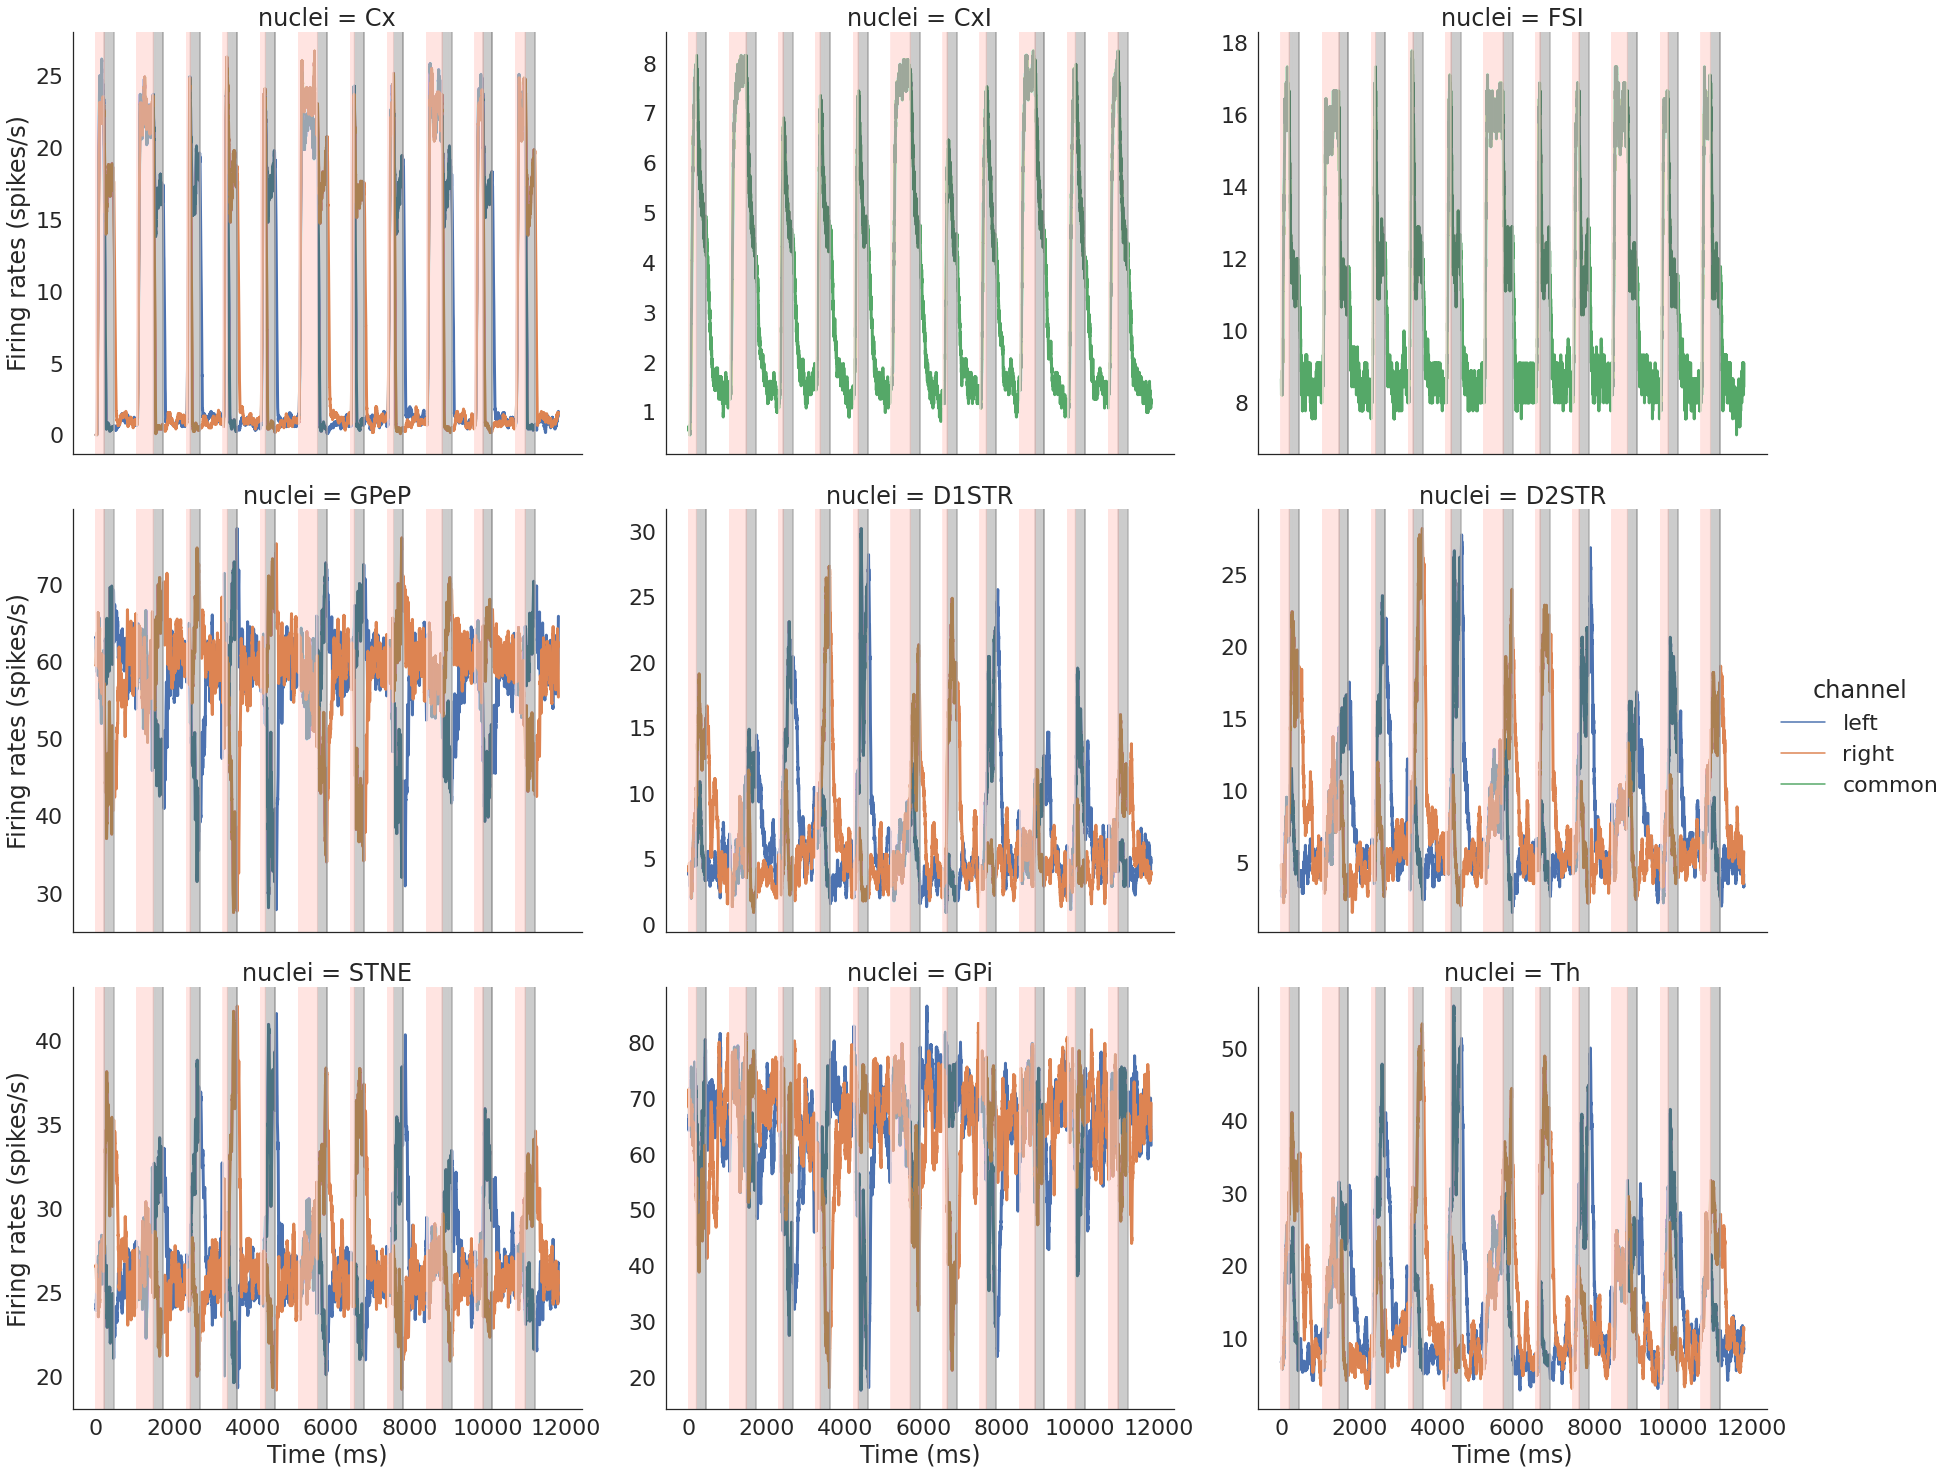

In [57]:
# Plot the firing rates extracted, figure handles are returned in fig_handles

FR_fig_handles = plt_func.plot_fr(firing_rates,datatables,experiment_choice)
FR_fig_handles[0].savefig(figure_dir+"Example_FR_"+postfix+".png",dpi=300)

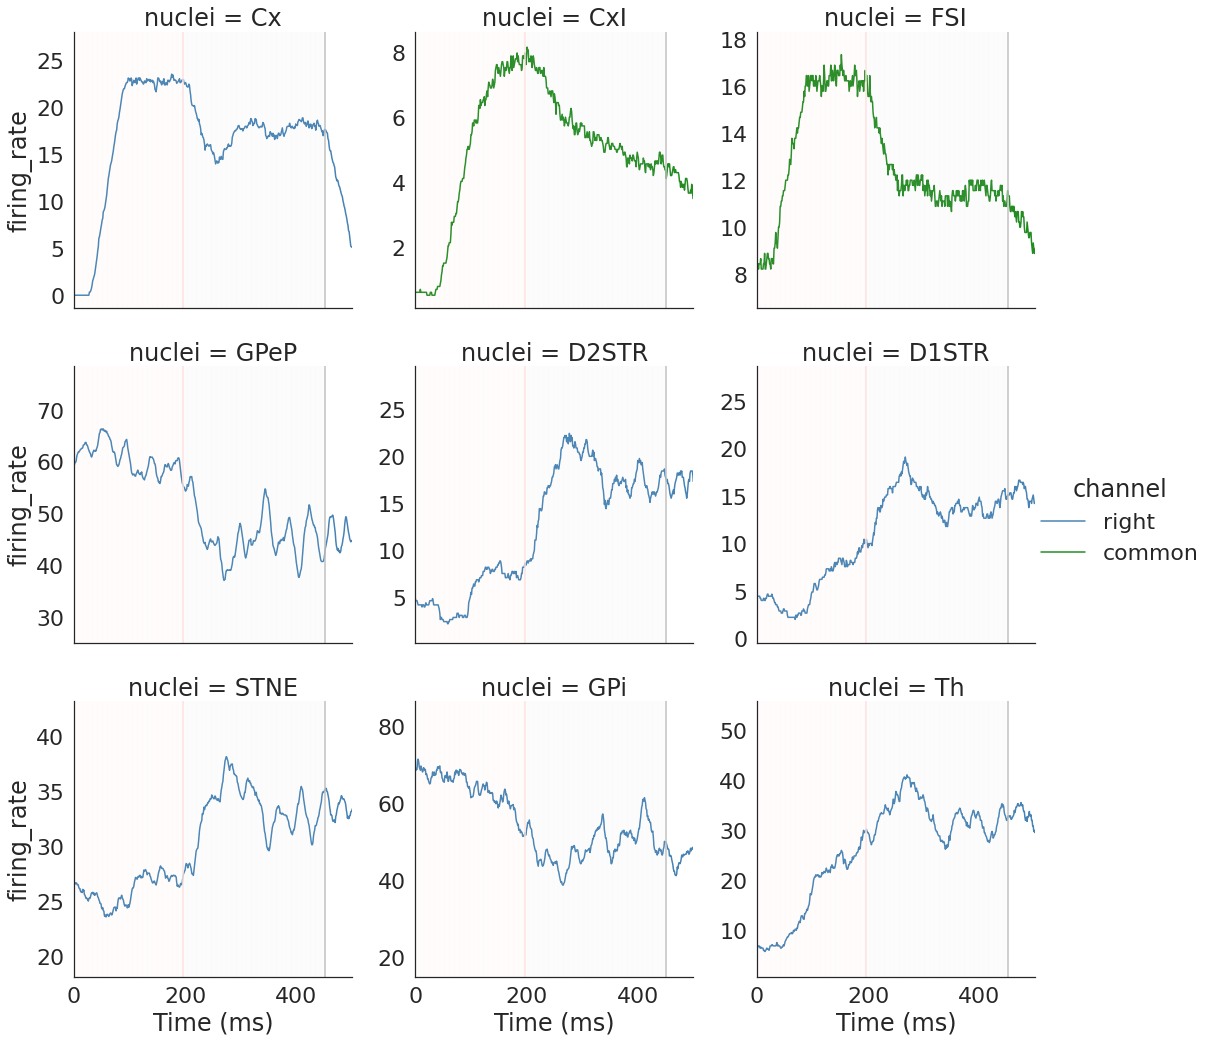

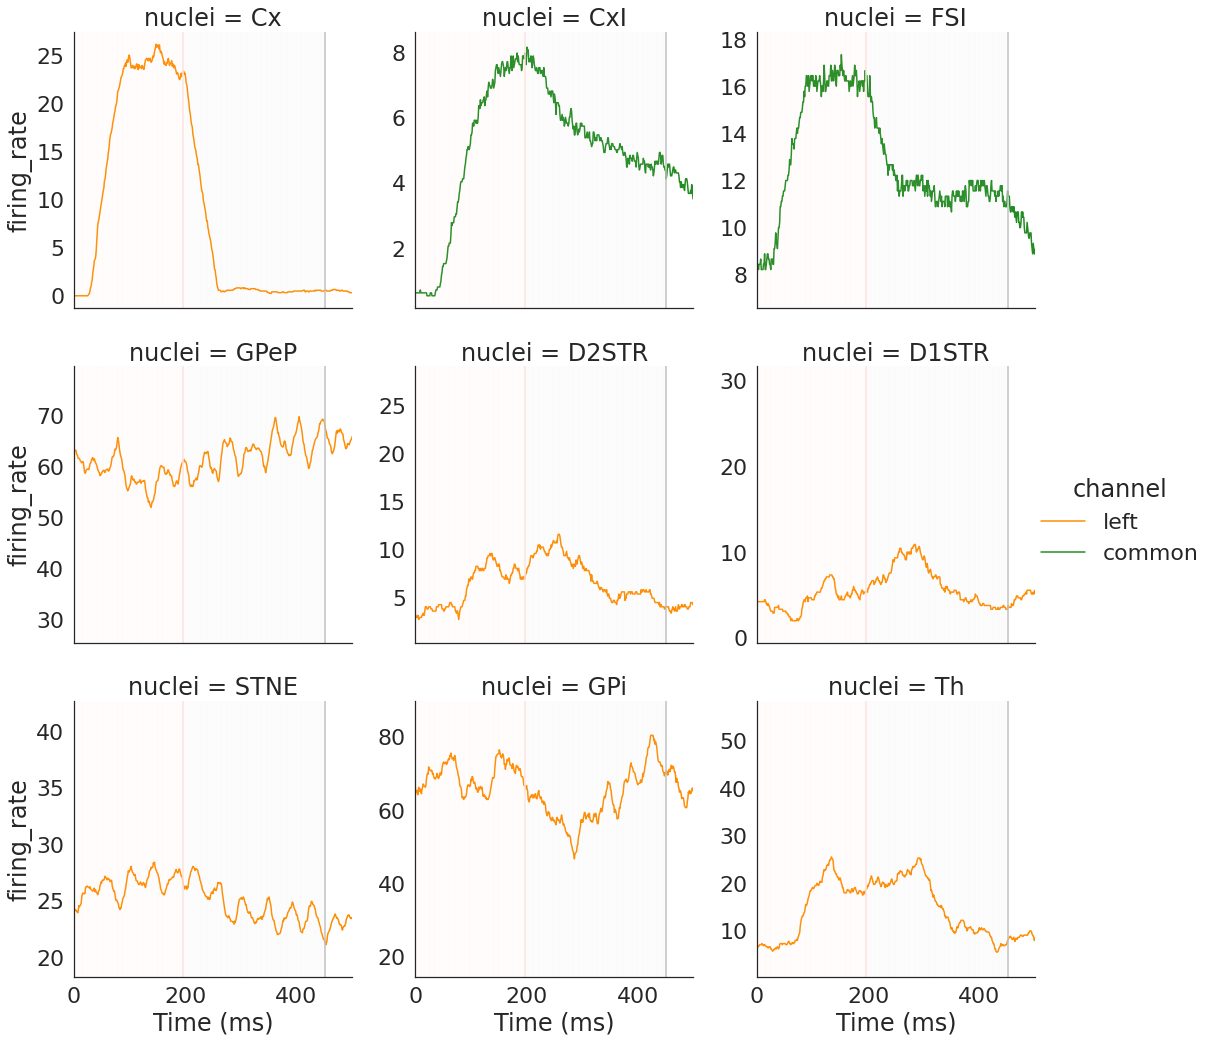

In [58]:
FR_fig_handles_zoom = plt_func.plot_fr_flex(firing_rates[0],datatables[0],['all'], [], (0, 500)) 

In [ ]:
reward_fig_handles = plt_func.plot_reward_Q_df(reward_q_df)